# Lucid Modelzoo

If you want to study techniques for visualizing and understanding neural networks, it's important to be able to try your experiments on multiple models.

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neural networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

In [5]:
# Expanded modelzoo is only available as of lucid v0.3
!pip install --quiet "lucid>=0.3.11"
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [3]:
import numpy as np
import tensorflow as tf

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

## Import Modelzoo

In [4]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

## List Models

As of lucid v0.3

In [5]:
print()
print("Model".ljust(27), " ", "Dataset")
print()
for name, Model in nets.models_map.items():
    print(name.ljust(27), " ", Model.dataset)


Model                         Dataset

AlexNet                       ImageNet
AlexNet_caffe_Places365       Places365
CaffeNet_caffe                ImageNet
Clip_ResNet50_4x              None
InceptionResnetV2_slim        ImageNet
InceptionV1                   ImageNet
InceptionV1_adv_finetuned     ImageNet
InceptionV1_caffe             ImageNet
InceptionV1_caffe_Places205   Places205
InceptionV1_caffe_Places365   Places365
InceptionV1_slim              ImageNet
InceptionV2_slim              ImageNet
InceptionV3_slim              ImageNet
InceptionV4_slim              ImageNet
MobilenetV1_025_slim          ImageNet
MobilenetV1_050_slim          ImageNet
MobilenetV1_slim              ImageNet
MobilenetV2_10_slim           ImageNet
MobilenetV2_14_slim           ImageNet
NasnetLarge_slim              ImageNet
NasnetMobile_slim             ImageNet
PnasnetLarge_slim             ImageNet
PnasnetMobile_slim            ImageNet
ResnetV1_101_slim             ImageNet
ResnetV1_152_slim        

## List Model Layers

In [6]:
models.InceptionV4_slim.layers

(Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Conv2d_1a_3x3/Relu: 32> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Conv2d_2a_3x3/Relu: 32> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Conv2d_2b_3x3/Relu: 64> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_3a/concat: 160> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_4a/concat: 192> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5a/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5b/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5c/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5d/concat: 384> ([{'conv'}]),
 Layer (belonging to InceptionV4_slim) <InceptionV4/InceptionV4/Mixed_5e/concat: 384> ([{'conv

## Show Model Graph

In [7]:
%load_ext tensorboard
model = models.InceptionV4_slim()
#model.load_graphdef()
#model.show_graph()

In [8]:
with tf.compat.v1.Graph().as_default():
    graph = model.graph_def
    tf.compat.v1.summary.FileWriter('logs/train', graph=graph).close()
%tensorboard --logdir logs/train

## Visualize Neuron

See the [lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) to learn more.

We pick `InceptionV4/InceptionV4/Mixed_6b/concat` from above, and chose to focus on unit 0.

512 13.998398



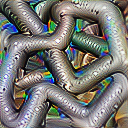

In [7]:
model = models.InceptionV4_slim()
model.load_graphdef()

_ = render.render_vis(model, "InceptionV4/InceptionV4/Mixed_6b/concat:0")

## Caricature

See the [inversion and caricature notebook](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/misc/feature_inversion_caricatures.ipynb) to learn more.


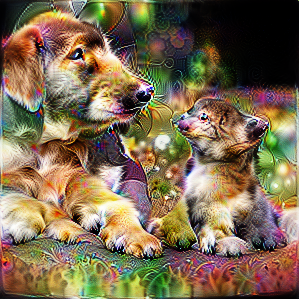


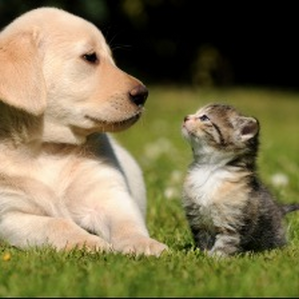
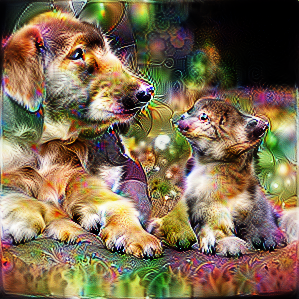

In [8]:
from lucid.recipes.caricature import feature_inversion

img = load("https://distill.pub/2019/activation-atlas/assets/images/dogcat.jpg")
#img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")

model = models.InceptionV4_slim()
model.load_graphdef()

result = feature_inversion(img, model, "InceptionV4/InceptionV4/Mixed_6b/concat", n_steps=512, cossim_pow=0.0)
show(result)